In [1347]:
import warnings
warnings.filterwarnings('ignore')

In [1348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1349]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1350]:
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1351]:
pd.set_option('display.max_columns',None)

# 1.Data Import

In [1352]:
leads = pd.read_csv('./Leads.csv')

In [1353]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1354]:
rows1,columns1 = leads.shape
print('Number of records:')
print(rows1)
print('Number of features:')
print(columns1)

Number of records:
9240
Number of features:
37


In [1355]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1356]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2.Data Insepection and cleaning

In [1357]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1358]:
leads.select_dtypes(include = 'object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,b2f1689a-e1ca-495c-8c1c-2c2ec2484155,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


We can see that several columns have select as a value, which is result of the prospect not selecting any value in that field, which means it is all good as having Null. Therefore replacing all select values with Null

In [1359]:
leads.replace('Select',np.nan,inplace = True)

## 2.1 Null value check

In [1360]:
print('Number of columns with null values:')
print((leads.isnull().sum(axis = 0)>0).sum())
print('*'*80)
print(leads.isnull().sum(axis = 0)[leads.isnull().sum(axis = 0)>0].sort_values(ascending = False))
print('*'*80)
print('null values as percentage of total records:\n')
print(round(100*leads.isnull().sum(axis = 0)[leads.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads),2))

Number of columns with null values:
17
********************************************************************************
How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Asymmetrique Activity Score                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source     

### How did you hear about X Education

In [1361]:
print(round(100*leads['How did you hear about X Education'].isnull().sum()/len(leads),2))

78.46


In [1362]:
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [1363]:
print(round(100*leads.groupby('How did you hear about X Education')['Converted'].mean()).reset_index())

  How did you hear about X Education  Converted
0                     Advertisements       46.0
1                              Email       50.0
2                   Multiple Sources       37.0
3                      Online Search       42.0
4                              Other       40.0
5                                SMS       22.0
6                       Social Media       42.0
7              Student of SomeSchool       46.0
8                      Word Of Mouth       44.0


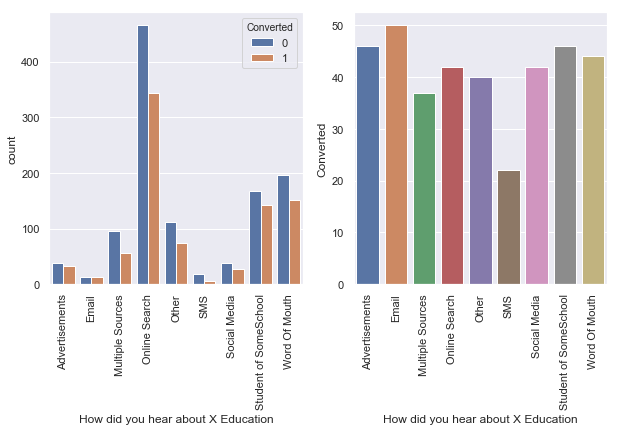

In [1364]:
order = sorted(leads['How did you hear about X Education'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'How did you hear about X Education',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'How did you hear about X Education',y='Converted',data = round(100*leads.groupby('How did you hear about X Education')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

As we can see that there isnt a huge variation in terms conversion rate for majority of them. We can see that conversion rate through SMS is very low hence may be education X can avoid sending sms.

### Lead Profile 

In [1365]:
leads['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1366]:
print(round(100*leads.groupby('Lead Profile')['Converted'].mean()).reset_index())

                  Lead Profile  Converted
0  Dual Specialization Student      100.0
1              Lateral Student       96.0
2                  Other Leads       37.0
3               Potential Lead       79.0
4        Student of SomeSchool        4.0


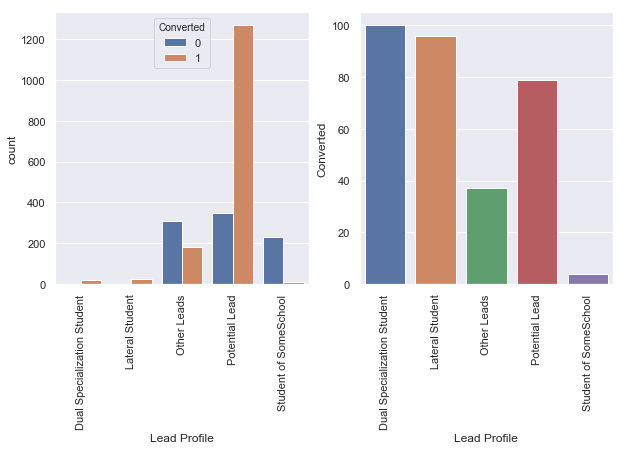

In [1367]:
order = sorted(leads['Lead Profile'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Profile',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Profile',y='Converted',data = round(100*leads.groupby('Lead Profile')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

We can see that except other Leads and Studen of SomeSchool other have significantly higher percentage of conversion rate

### Lead Quality

In [1368]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1369]:
print(round(100*leads.groupby('Lead Quality')['Converted'].mean()).reset_index())

        Lead Quality  Converted
0  High in Relevance       95.0
1   Low in Relevance       82.0
2           Might be       76.0
3           Not Sure       24.0
4              Worst        2.0


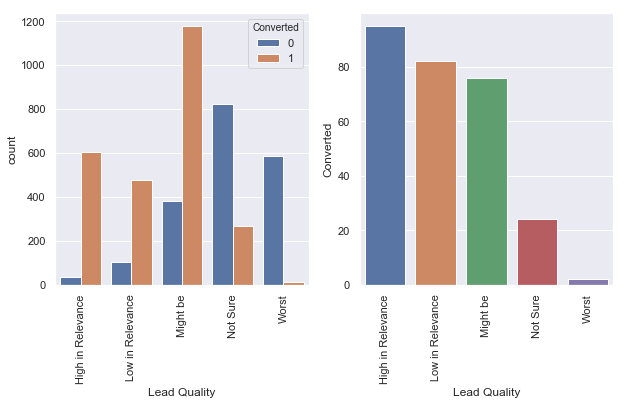

In [1370]:
order = sorted(leads['Lead Quality'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Quality',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Quality',y='Converted',data = round(100*leads.groupby('Lead Quality')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

We can see that worst and Not sure have significantly lower conversion rates

### Asymmetrique Profile Score

In [1371]:
leads['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [1372]:
print(round(100*leads.groupby('Asymmetrique Profile Score')['Converted'].mean()).reset_index())

   Asymmetrique Profile Score  Converted
0                        11.0       56.0
1                        12.0       45.0
2                        13.0       24.0
3                        14.0       25.0
4                        15.0       28.0
5                        16.0       41.0
6                        17.0       45.0
7                        18.0       36.0
8                        19.0       74.0
9                        20.0       71.0


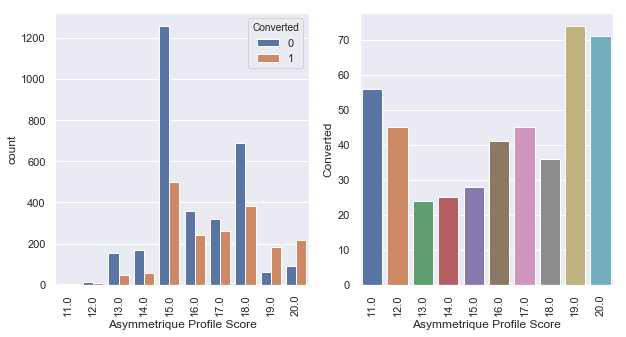

In [1373]:
order = sorted(leads['Asymmetrique Profile Score'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Profile Score',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Profile Score',y='Converted',data = round(100*leads.groupby('Asymmetrique Profile Score')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Asymmetrique Profile Index

In [1374]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [1375]:
print(round(100*leads.groupby('Asymmetrique Profile Index')['Converted'].mean()).reset_index())

  Asymmetrique Profile Index  Converted
0                    01.High       47.0
1                  02.Medium       30.0
2                     03.Low       48.0


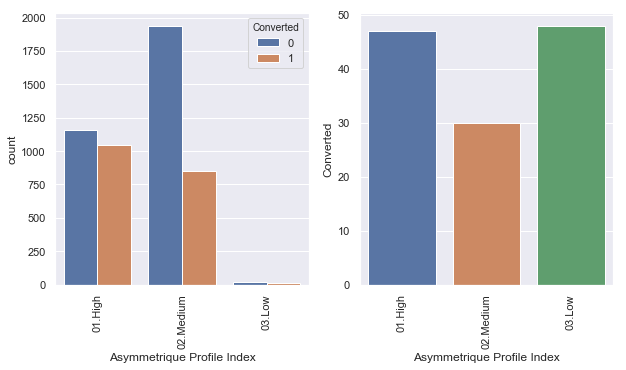

In [1376]:
order = sorted(leads['Asymmetrique Profile Index'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Profile Index',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Profile Index',y='Converted',data = round(100*leads.groupby('Asymmetrique Profile Index')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Asymmetrique Activity Score

In [1377]:
leads['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [1378]:
print(round(100*leads.groupby('Asymmetrique Activity Score')['Converted'].mean()).reset_index())

    Asymmetrique Activity Score  Converted
0                           7.0        0.0
1                           8.0        0.0
2                           9.0        0.0
3                          10.0        5.0
4                          11.0        7.0
5                          12.0       12.0
6                          13.0       13.0
7                          14.0       40.0
8                          15.0       64.0
9                          16.0       49.0
10                         17.0        5.0
11                         18.0        0.0


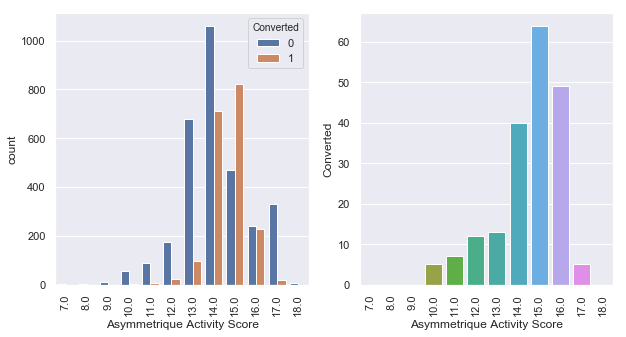

In [1379]:
order = sorted(leads['Asymmetrique Activity Score'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Activity Score',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Activity Score',y='Converted',data = round(100*leads.groupby('Asymmetrique Activity Score')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Asymmetrique Activity Index

In [1380]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [1381]:
print(round(100*leads.groupby('Asymmetrique Activity Index')['Converted'].mean()).reset_index())

  Asymmetrique Activity Index  Converted
0                     01.High       30.0
1                   02.Medium       42.0
2                      03.Low        9.0


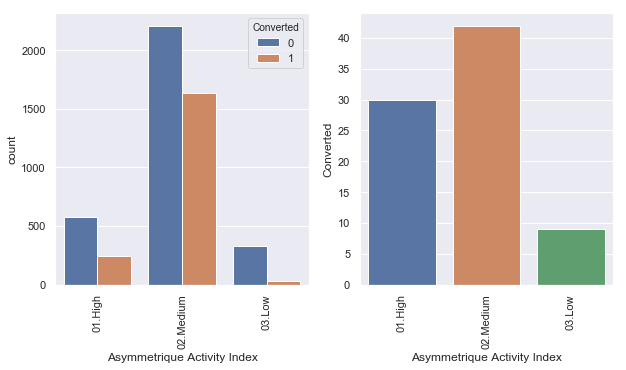

In [1382]:
order = sorted(leads['Asymmetrique Activity Index'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Activity Index',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Activity Index',y='Converted',data = round(100*leads.groupby('Asymmetrique Activity Index')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### City

In [1383]:
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1384]:
print(round(100*leads.groupby('City')['Converted'].mean()).reset_index())

                          City  Converted
0                       Mumbai       41.0
1                 Other Cities       40.0
2  Other Cities of Maharashtra       44.0
3           Other Metro Cities       41.0
4            Thane & Outskirts       45.0
5               Tier II Cities       34.0


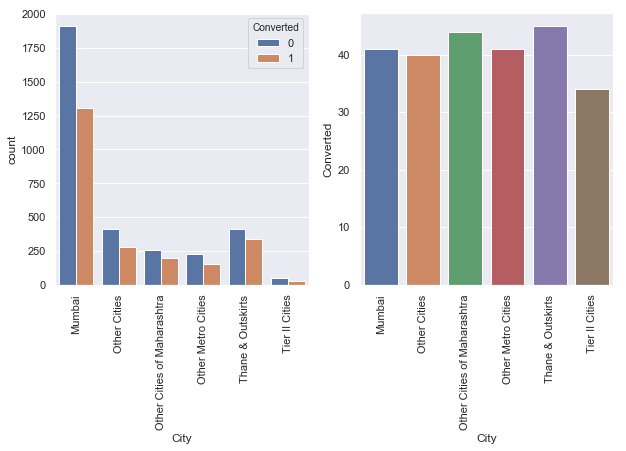

In [1385]:
order = sorted(leads['City'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'City',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'City',y='Converted',data = round(100*leads.groupby('City')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

No noticible trend in conversion rates

### Specialization

In [1386]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [1387]:
print(round(100*leads.groupby('Specialization')['Converted'].mean()).reset_index())

                       Specialization  Converted
0   Banking, Investment And Insurance       49.0
1             Business Administration       44.0
2                          E-Business       37.0
3                          E-COMMERCE       36.0
4                  Finance Management       45.0
5               Healthcare Management       50.0
6              Hospitality Management       42.0
7           Human Resource Management       46.0
8              IT Projects Management       38.0
9              International Business       36.0
10               Marketing Management       49.0
11              Media and Advertising       42.0
12              Operations Management       47.0
13                  Retail Management       34.0
14             Rural and Agribusiness       42.0
15                Services Excellence       28.0
16            Supply Chain Management       43.0
17                 Travel and Tourism       35.0


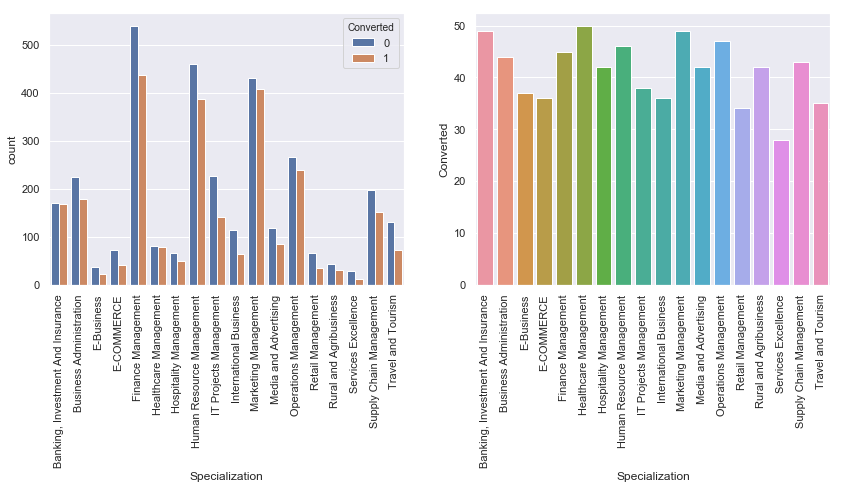

In [1388]:
order = sorted(leads['Specialization'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Specialization',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Specialization',y='Converted',data = round(100*leads.groupby('Specialization')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Tags

In [1389]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1390]:
print(round(100*leads.groupby('Tags')['Converted'].mean()).reset_index())

                                                 Tags  Converted
0                                   Already a student        1.0
1                                                Busy       56.0
2                                  Closed by Horizzon       99.0
3                       Diploma holder (Not Eligible)        2.0
4                              Graduation in progress        6.0
5               In confusion whether part time or DLP       20.0
6                        Interested  in full time MBA        3.0
7                            Interested in Next batch      100.0
8                         Interested in other courses        3.0
9                                     Lateral student      100.0
10                                       Lost to EINS       98.0
11                                     Lost to Others        0.0
12                        Not doing further education        1.0
13                   Recognition issue (DEC approval)        0.0
14                       

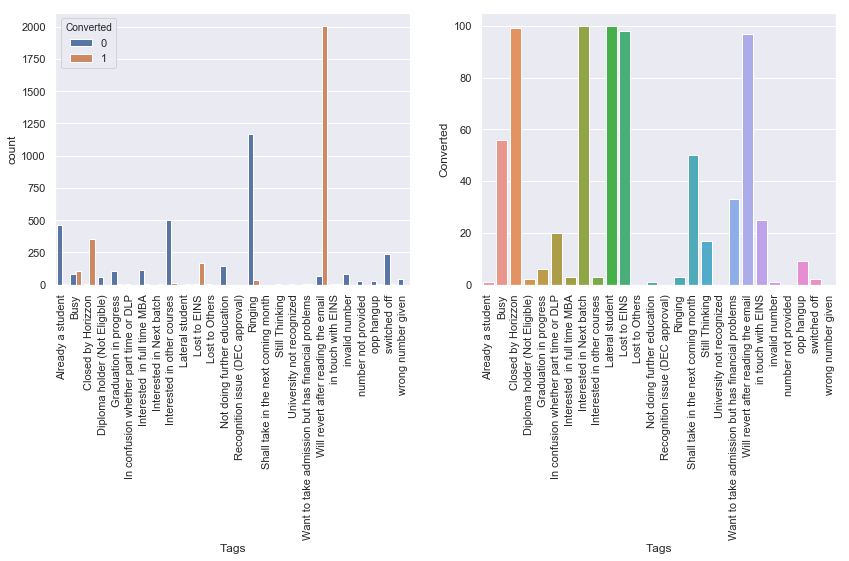

In [1391]:
order = sorted(leads['Tags'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Tags',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Tags',y='Converted',data = round(100*leads.groupby('Tags')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

There seems to be large difference in conversion rates across different labels

### What matters most to you in choosing a course

In [1392]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1393]:
print(round(100*leads.groupby('What matters most to you in choosing a course')['Converted'].mean()).reset_index())

  What matters most to you in choosing a course  Converted
0                       Better Career Prospects       49.0
1                     Flexibility & Convenience       50.0
2                                         Other        0.0


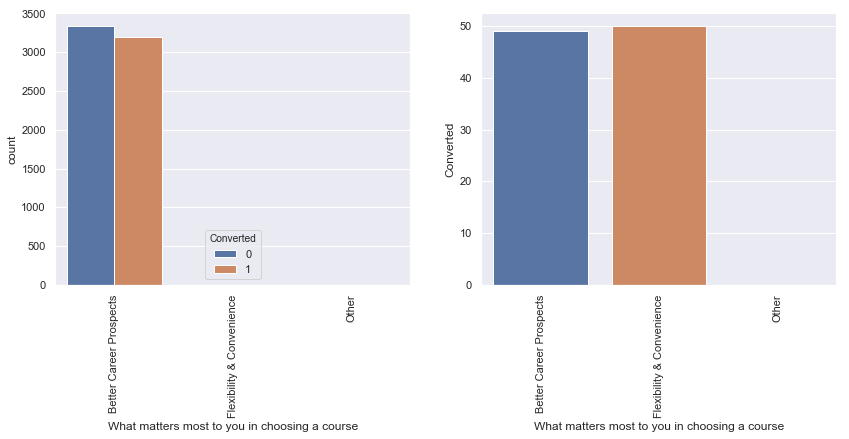

In [1394]:
order = sorted(leads['What matters most to you in choosing a course'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'What matters most to you in choosing a course',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'What matters most to you in choosing a course',y='Converted',data = round(100*leads.groupby('What matters most to you in choosing a course')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### What is your current occupation

In [1395]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1396]:
print(round(100*leads.groupby('What is your current occupation')['Converted'].mean()).reset_index())

  What is your current occupation  Converted
0                     Businessman       62.0
1                       Housewife      100.0
2                           Other       62.0
3                         Student       37.0
4                      Unemployed       44.0
5            Working Professional       92.0


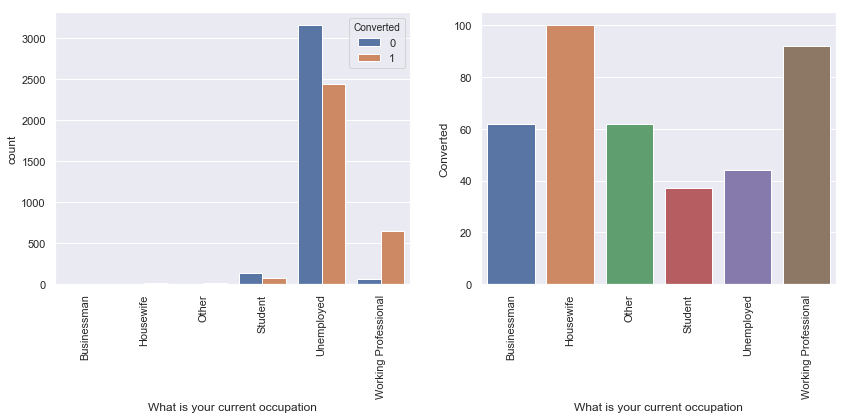

In [1397]:
order = sorted(leads['What is your current occupation'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'What is your current occupation',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'What is your current occupation',y='Converted',data = round(100*leads.groupby('What is your current occupation')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Working professionals seems to have more conversion rate

### Country

In [1398]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Canada                     4
South Africa               4
Kuwait                     4
Sweden                     3
Italy                      2
Belgium                    2
Bangladesh                 2
Ghana                      2
Philippines                2
Uganda                     2
Netherlands                2
Asia/Pacific Region        2
China                      2
Tanzania                   1
Vietnam                    1
Russia                     1
Indonesia                  1
Liberia                    1
Kenya                      1
Sri Lanka     

In [1399]:
print(round(100*leads.groupby('Country')['Converted'].mean()).reset_index())

                 Country  Converted
0    Asia/Pacific Region       50.0
1              Australia       23.0
2                Bahrain       57.0
3             Bangladesh       50.0
4                Belgium        0.0
5                 Canada        0.0
6                  China        0.0
7                Denmark      100.0
8                 France       50.0
9                Germany       25.0
10                 Ghana        0.0
11             Hong Kong       57.0
12                 India       37.0
13             Indonesia        0.0
14                 Italy        0.0
15                 Kenya        0.0
16                Kuwait        0.0
17               Liberia        0.0
18              Malaysia        0.0
19           Netherlands       50.0
20               Nigeria        0.0
21                  Oman       50.0
22           Philippines        0.0
23                 Qatar       10.0
24                Russia        0.0
25          Saudi Arabia       19.0
26             Singapore    

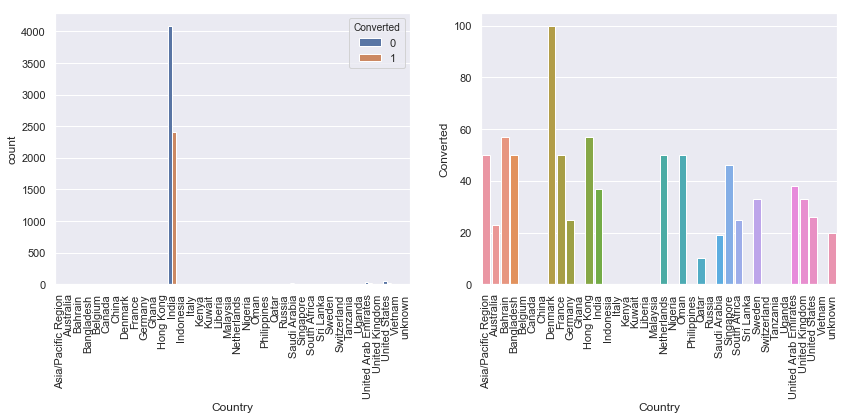

In [1400]:
order = sorted(leads['Country'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Country',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Country',y='Converted',data = round(100*leads.groupby('Country')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Dropping colums which have high number of null values and doesnt have significance impact on the conversion rate

In [1401]:
to_be_dropped = round(100*leads.isnull().sum(axis = 0)[leads.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads),2)

In [1402]:
print('Number of columns to be dropped:')
print(len(to_be_dropped[to_be_dropped>30].index.tolist()))

Number of columns to be dropped:
10


In [1403]:
leads1 = leads.drop(to_be_dropped[to_be_dropped>30].index.tolist(),axis = 1)

In [1404]:
rows2,column2 = leads1.shape

In [1405]:
print('Number of columns dropped:')
print(columns1-column2)

Number of columns dropped:
10


In [1406]:
#Dropping Country,Current Occcupation and reason for chosing course
leads1.drop(['Country','What matters most to you in choosing a course','What is your current occupation'],axis = 1,inplace = True)

In [1407]:
print('Number of columns with null values:')
print((leads1.isnull().sum(axis = 0)>0).sum())
print('*'*80)
print(leads1.isnull().sum(axis = 0)[leads1.isnull().sum(axis = 0)>0].sort_values(ascending = False))
print('*'*80)
print('null values as percentage of total records:\n')
print(round(100*leads1.isnull().sum(axis = 0)[leads1.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

Number of columns with null values:
4
********************************************************************************
Page Views Per Visit    137
TotalVisits             137
Last Activity           103
Lead Source              36
dtype: int64
********************************************************************************
null values as percentage of total records:

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64


In [1408]:
#Dropping the rows with null values
leads2 = leads1[~pd.isnull(leads1['TotalVisits'])]

In [1409]:
rows2,columns2 = leads2.shape

In [1410]:
print('Rows dropped:')
print(rows1-rows2)

Rows dropped:
137


In [1411]:
print('Number of columns with null values:')
print((leads2.isnull().sum(axis = 0)>0).sum())
print('*'*80)
print(leads2.isnull().sum(axis = 0)[leads2.isnull().sum(axis = 0)>0].sort_values(ascending = False))
print('*'*80)
print('null values as percentage of total records:\n')
print(round(100*leads2.isnull().sum(axis = 0)[leads2.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

Number of columns with null values:
1
********************************************************************************
Lead Source    29
dtype: int64
********************************************************************************
null values as percentage of total records:

Lead Source    0.31
dtype: float64


In [1412]:
leads2['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
welearnblog_Home        1
testone                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [1413]:
leads2[pd.isnull(leads2['Lead Source'])]['Lead Origin'].value_counts()

Lead Add Form              27
Landing Page Submission     1
Lead Import                 1
Name: Lead Origin, dtype: int64

In [1414]:
leads2.groupby(['Lead Origin','Lead Source']).count()

Prospect ID  Lead Number  \
Lead Origin             Lead Source                                   
API                     Direct Traffic             110          110   
                        Google                    1158         1158   
                        Olark Chat                1751         1751   
                        Organic Search             456          456   
                        Referral Sites              98           98   
                        Social Media                 1            1   
                        bing                         4            4   
Landing Page Submission Direct Traffic            2433         2433   
                        Facebook                     1            1   
                        Google                    1709         1709   
                        NC_EDM                       1            1   
                        Organic Search             698          698   
                        Pay per Click Ads            1            1   
                        Press_Release                2            2   
                        Referral Sites              27           27   
                        Social Media                 1            1   
                        WeLearn                      1            1   
                        bing                         2            2   
                        blog                         1            1   
                        google                       5            5   
                        testone                      1            1   
                        welearnblog_Home             1            1   
                        youtubechannel               1            1   
Lead Add Form           Click2call                   4            4   
                        Google                       1            1   
                        Live Chat                    2            2   
                        Olark Chat                   2            2   
                        Reference                  443          443   
                        Welingak Website           129          129   
Lead Import             Facebook                    30           30   

                                           Do Not Email  Do Not Call  \
Lead Origin             Lead Source                                    
API                     Direct Traffic              110          110   
                        Google                     1158         1158   
                        Olark Chat                 1751         1751   
                        Organic Search              456          456   
                        Referral Sites               98           98   
                        Social Media                  1            1   
                        bing                          4            4   
Landing Page Submission Direct Traffic             2433         2433   
                        Facebook                      1            1   
                        Google                     1709         1709   
                        NC_EDM                        1            1   
                        Organic Search              698          698   
                        Pay per Click Ads             1            1   
                        Press_Release                 2            2   
                        Referral Sites               27           27   
                        Social Media                  1            1   
                        WeLearn                       1            1   
                        bing                          2            2   
                        blog                          1            1   
                        google                        5            5   
                        testone                       1            1   
                        welearnblog_Home              1            1   
                        youtubechannel    

In [1415]:
leads3 = leads2[~(pd.isnull(leads1['Lead Source']))]

In [1416]:
rows3,columns3 = leads3.shape

In [1417]:
print('Rows dropped:')
print(rows2-rows3)

Rows dropped:
29


In [1418]:
print('Number of columns with null values:')
print((leads3.isnull().sum(axis = 0)>0).sum())
print('*'*80)
print(leads3.isnull().sum(axis = 0)[leads3.isnull().sum(axis = 0)>0].sort_values(ascending = False))
print('*'*80)
print('null values as percentage of total records:\n')
print(round(100*leads3.isnull().sum(axis = 0)[leads3.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

Number of columns with null values:
0
********************************************************************************
Series([], dtype: int64)
********************************************************************************
null values as percentage of total records:

Series([], dtype: float64)


In [1419]:
leads3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 

In [1420]:
leads3.select_dtypes(include = 'object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,9074,4,21,2,2,17,2,1,2,2,2,2,2,1,1,1,1,2,16
top,b2f1689a-e1ca-495c-8c1c-2c2ec2484155,Landing Page Submission,Google,No,No,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4885,2868,8358,9072,3432,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,9074,6186,3267


In [1421]:
print('Do Not Email:')
print(round(100*leads3['Do Not Email'].value_counts()/len(leads3),2))
print('*'*80)
print('Do Not Call:')
print(round(100*leads3['Do Not Call'].value_counts()/len(leads3),2))
print('*'*80)
print('Search:')
print(round(100*leads3['Search'].value_counts()/len(leads3),2))
print('*'*80)
print('Magazine:')
print(round(100*leads3['Magazine'].value_counts()/len(leads3),2))
print('*'*80)
print('Newspaper Article:')
print(round(100*leads3['Newspaper Article'].value_counts()/len(leads3),2))
print('*'*80)
print('X Education Forums:')
print(round(100*leads3['X Education Forums'].value_counts()/len(leads3),2))
print('*'*80)
print('Newspaper:')
print(round(100*leads3['Newspaper'].value_counts()/len(leads3),2))
print('*'*80)
print('Digital Advertisement:')
print(round(100*leads3['Digital Advertisement'].value_counts()/len(leads3),2))
print('*'*80)
print('Through Recommendations:')
print(round(100*leads3['Through Recommendations'].value_counts()/len(leads3),2))
print('*'*80)
print('Receive More Updates About Our Courses:')
print(round(100*leads3['Receive More Updates About Our Courses'].value_counts()/len(leads3),2))
print('*'*80)
print('Update me on Supply Chain Content:')
print(round(100*leads3['Update me on Supply Chain Content'].value_counts()/len(leads3),2))
print('*'*80)
print('Get updates on DM Content:')
print(round(100*leads3['Get updates on DM Content'].value_counts()/len(leads3),2))
print('*'*80)
print('I agree to pay the amount through cheque:')
print(round(100*leads3['I agree to pay the amount through cheque'].value_counts()/len(leads3),2))
print('*'*80)
print('A free copy of Mastering The Interview:')
print(round(100*leads3['A free copy of Mastering The Interview'].value_counts()/len(leads3),2))
print('*'*80)

Do Not Email:
No     92.11
Yes     7.89
Name: Do Not Email, dtype: float64
********************************************************************************
Do Not Call:
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
********************************************************************************
Search:
No     99.85
Yes     0.15
Name: Search, dtype: float64
********************************************************************************
Magazine:
No    100.0
Name: Magazine, dtype: float64
********************************************************************************
Newspaper Article:
No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64
********************************************************************************
X Education Forums:
No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64
********************************************************************************
Newspaper:
No     99.99
Yes     0.01
Name: Newspaper, dtype: float64
*********

We can see that most of the columns have 1 or 2 unique values and majority of then have almost 100% of rows containing same value. Hence dropping those columns

In [1423]:
columns_to_be_dropped = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads4 = leads3.drop(columns_to_be_dropped,axis = 1)

In [1424]:
rows4,columns4 = leads4.shape

In [1425]:
print('Number of columns dropped:')
print(columns3-columns4)

Number of columns dropped:
13


In [1426]:
leads4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
Last Notable Activity                     9074 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 850.7+ KB


In [1427]:
leads4.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


In [1428]:
leads4.set_index('Prospect ID',inplace = True)

In [1429]:
leads4.isnull().sum(axis = 0)

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Lead Origin

In [1430]:
leads4['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [1431]:
print(round(100*leads4.groupby('Lead Origin')['Converted'].mean()).reset_index())

               Lead Origin  Converted
0                      API       31.0
1  Landing Page Submission       36.0
2            Lead Add Form       94.0
3              Lead Import       30.0


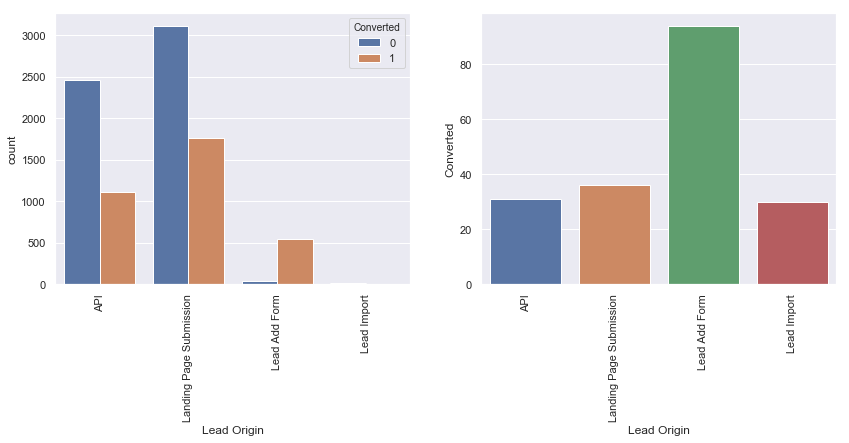

In [1432]:
order = sorted(leads4['Lead Origin'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Origin',hue = 'Converted',data = leads4,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Origin',y='Converted',data = round(100*leads4.groupby('Lead Origin')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Lead add form has large conversion rate

### Lead Source

In [1433]:
leads4['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
blog                    1
welearnblog_Home        1
testone                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [1434]:
leads4.loc[leads4['Lead Source'] == 'google','Lead Source'] = 'Google'

In [1435]:
leads_source_df = leads4['Lead Source'].value_counts()

In [1436]:
def leadsource(x):
    if x in leads_source_df[leads_source_df < 30].index.tolist():
        return 'Others'
    else :
        return x

In [1437]:
# Adding all small source to others
leads4['Lead Source'] = leads4['Lead Source'].apply(leadsource)

In [1438]:
leads4['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [1439]:
print(round(100*leads4.groupby('Lead Source')['Converted'].mean()).reset_index())

        Lead Source  Converted
0    Direct Traffic       32.0
1          Facebook       29.0
2            Google       40.0
3        Olark Chat       26.0
4    Organic Search       38.0
5            Others       39.0
6         Reference       93.0
7    Referral Sites       25.0
8  Welingak Website       98.0


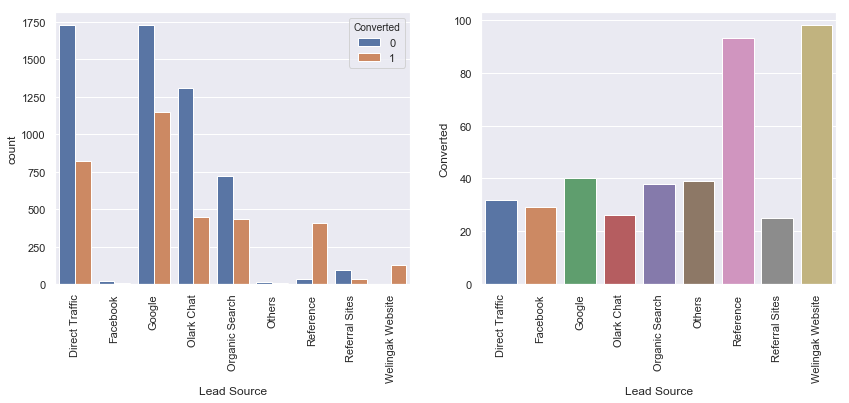

In [1440]:
order = sorted(leads4['Lead Source'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Source',hue = 'Converted',data = leads4,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Source',y='Converted',data = round(100*leads4.groupby('Lead Source')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Welingak website and reference have large conversion rate

### TotalVisits

In [1441]:
leads4.TotalVisits.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

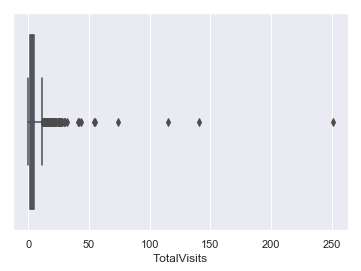

In [1442]:
sns.boxplot(leads4.TotalVisits)

There are outliers present in the totalvisits columns, removing the outliers by capping the max value at 99 percentile

In [1443]:
Q3 = leads4.TotalVisits.quantile(0.99)
leads4 = leads4[(leads4.TotalVisits <= Q3)]

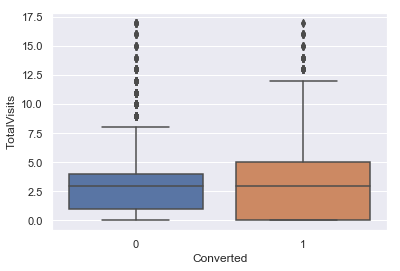

In [1444]:
sns.boxplot(y='TotalVisits',x='Converted',data = leads4)
plt.show()

There seems to be no effect of TotalVisits on the conversion rate

### Total Time Spent on Website

In [1445]:
leads4['Total Time Spent on Website'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

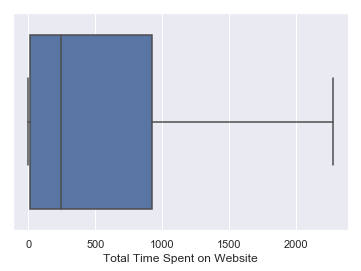

In [1446]:
sns.boxplot(leads4['Total Time Spent on Website'])
plt.show()

In [1447]:
Q3 = leads4['Total Time Spent on Website'].quantile(0.99)
leads4 = leads4[(leads4['Total Time Spent on Website'] <= Q3)]

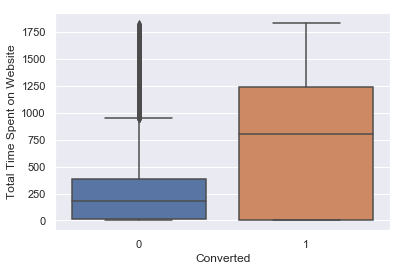

In [1448]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data = leads4)
plt.show()

Clearly the individuals who spend more time on website has more conversion rate

### Page Views Per Visit

In [1449]:
leads4['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8901.000000
mean        2.336171
std         2.063347
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

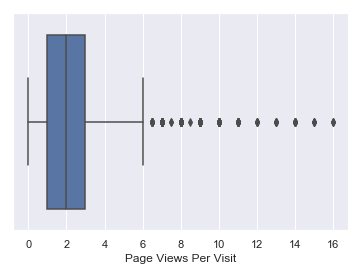

In [1450]:
sns.boxplot(leads4['Page Views Per Visit'])
plt.show()

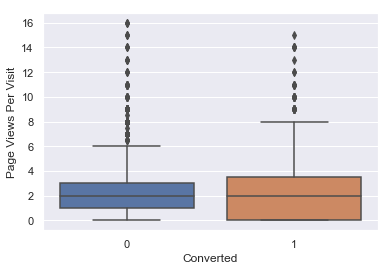

In [1451]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data = leads4)
plt.show()

No effect on conversion rate

In [1452]:
leads_final = leads4.drop('Lead Number',axis = 1)

In [1453]:
leads_final.shape

(8901, 9)

### Last Activity

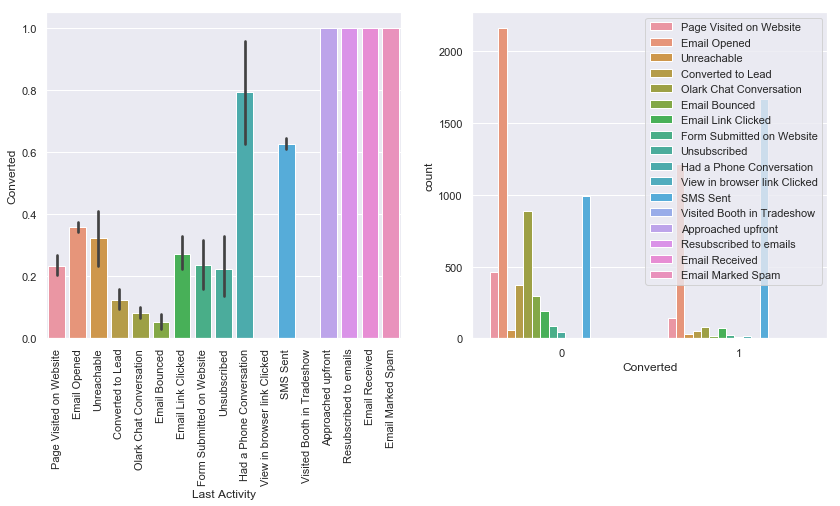

In [1454]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Last Activity',y= 'Converted',data = leads_final)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.countplot(x='Converted',hue = 'Last Activity',data = leads_final)
plt.legend(loc='upper right')
plt.show()

### Last Notable Activity

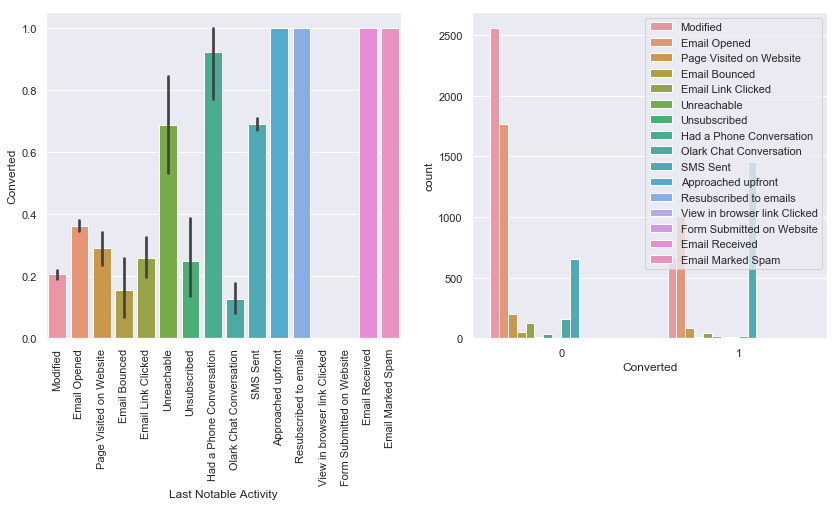

In [1455]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Last Notable Activity',y= 'Converted',data = leads_final)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.countplot(x='Converted',hue = 'Last Notable Activity',data = leads_final)
plt.legend(loc='upper right')
plt.show()

# Dummy creation

In [1456]:
leads_final

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
Prospect ID,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.50,Email Opened,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,No,Modified
2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,No,Modified
9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,No,Modified
20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,No,Modified
cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,Yes,Email Opened


In [1457]:
leads_final['A free copy of Mastering The Interview'] = leads_final['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [1458]:
leads_dummy_df = pd.get_dummies(leads_final,drop_first = True)

In [1459]:
leads_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8901 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 47 columns):
Converted                                             8901 non-null int64
TotalVisits                                           8901 non-null float64
Total Time Spent on Website                           8901 non-null int64
Page Views Per Visit                                  8901 non-null float64
A free copy of Mastering The Interview                8901 non-null int64
Lead Origin_Landing Page Submission                   8901 non-null uint8
Lead Origin_Lead Add Form                             8901 non-null uint8
Lead Origin_Lead Import                               8901 non-null uint8
Lead Source_Facebook                                  8901 non-null uint8
Lead Source_Google                                    8901 non-null uint8
Lead Source_Olark Chat                                8901 non-null uint8
Lead Source_O

In [1460]:
plt.figure(figsize = (24,24))
sns.heatmap(leads_dummy_df.corr(),annot = True)
plt.show()

# Train test Data

In [1461]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8901 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 9 columns):
Lead Origin                               8901 non-null object
Lead Source                               8901 non-null object
Converted                                 8901 non-null int64
TotalVisits                               8901 non-null float64
Total Time Spent on Website               8901 non-null int64
Page Views Per Visit                      8901 non-null float64
Last Activity                             8901 non-null object
A free copy of Mastering The Interview    8901 non-null int64
Last Notable Activity                     8901 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 1015.4+ KB


In [1462]:
X = leads_dummy_df.drop('Converted',axis = 1)
y = leads_dummy_df['Converted']

In [1463]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

# Standardization

In [1464]:
scaler = StandardScaler()

In [1465]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1466]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52fc93b9-9bc6-4eec-8d55-81010968a932,-1.065494,-0.880451,-1.130352,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
85195b85-b384-4745-8e50-719566f70f52,0.923925,-0.359360,0.321547,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
94537f7d-12c0-4ea1-ab7e-c19ecab33f55,0.260785,-0.762968,0.805513,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
f388f77b-af57-4cdb-bf93-ebd34055bec8,1.918634,0.972737,1.047497,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
d1d0d30e-7e88-4978-80e2-8209b9b2dc0d,0.592355,1.895541,1.289480,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
b2711961-6a1f-4ed8-9ef7-80df7b31ea05,0.260785,1.461614,0.805513,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11769da0-737d-4bc8-a219-b44b7b47fd86,1.918634,2.194931,-0.041428,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
c65fac2d-af5c-42ba-a5b8-848e5ca8e10d,-1.065494,-0.880451,-1.130352,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
c7748892-cd82-4023-810f-f00ba97154ad,-0.070785,-0.550742,0.321547,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Model building

In [1467]:
import statsmodels.api as sm

In [1468]:
X_model1 = sm.add_constant(X_train)
logmodel1 = sm.GLM(y_train,X_model1,family = sm.families.Binomial())

In [1469]:
X_model1

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52fc93b9-9bc6-4eec-8d55-81010968a932,1.0,-1.065494,-0.880451,-1.130352,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
85195b85-b384-4745-8e50-719566f70f52,1.0,0.923925,-0.359360,0.321547,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
94537f7d-12c0-4ea1-ab7e-c19ecab33f55,1.0,0.260785,-0.762968,0.805513,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
f388f77b-af57-4cdb-bf93-ebd34055bec8,1.0,1.918634,0.972737,1.047497,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
d1d0d30e-7e88-4978-80e2-8209b9b2dc0d,1.0,0.592355,1.895541,1.289480,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
b2711961-6a1f-4ed8-9ef7-80df7b31ea05,1.0,0.260785,1.461614,0.805513,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11769da0-737d-4bc8-a219-b44b7b47fd86,1.0,1.918634,2.194931,-0.041428,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
c65fac2d-af5c-42ba-a5b8-848e5ca8e10d,1.0,-1.065494,-0.880451,-1.130352,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
c7748892-cd82-4023-810f-f00ba97154ad,1.0,-0.070785,-0.550742,0.321547,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1470]:
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        22:09:30   Pearson chi2:                 6.22e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               4.068e+15   4.32e+07   9.41e+07      0.000    4.07e+15    4.07e+15
TotalVisits                                         2.606e+14   1.38e+06   1.89e+08      0.000    2.61e+14    2.61e+14
Total Time Spent on Website                         1.133e+15    9.8e+05   1.16e+09      0.000    1.13e+15    1.13e+15
Page Views Per Visit                               -1.267e+14   1.44e+06  -8.78e+07      0.000   -1.27e+14   -1.27e+14
A free copy of Mastering The Interview              1.168e+14   2.65e+06   4.41e+07      0.000    1.17e+14    1.17e+14
Lead Origin_Landing Page Submission                -6.897e+13   2.72e+06  -2.54e+07      0.000    -6.9e+13    -6.9e+13
Lead Origin_Lead Add Form                           1.968e+15   3.11e+07   6.33e+07      0.000    1.97e+15    1.97e+15
Lead Origin_Lead Import                             3.149e+15   6.86e+07   4.59e+07      0.000    3.15e+15    3.15e+15
Lead Source_Facebook                               -3.175e+15   6.72e+07  -4.73e+07      0.000   -3.17e+15   -3.17e+15
Lead Source_Google                                  1.332e+14   2.84e+06   4.69e+07      0.000    1.33e+14    1.33e+14
Lead Source_Olark Chat                              1.009e+15   3.98e+06   2.54e+08      0.000    1.01e+15    1.01e+15
Lead Source_Organic Search                          7.278e+13   3.22e+06   2.26e+07      0.000    7.28e+13    7.28e+13
Lead Source_Others                                   1.23e+14   1.76e+07   6.99e+06      0.000    1.23e+14    1.23e+14
Lead Source_Reference                               1.534e+15   3.14e+07   4.89e+07      0.000    1.53e+15    1.53e+15
Lead Source_Referral Sites                         -2.609e+14   7.91e+06   -3.3e+07      0.000   -2.61e+14   -2.61e+14
Lead Source_Welingak Website                        2.574e+15   3.19e+07   8.06e+07      0.000    2.57e+15    2.57e+15
Last Activity_Converted to Lead                    -5.281e+15   4.77e+07  -1.11e+08      0.000   -5.28e+15   -5.28e+15
Last Activity_Email Bounced                        -6.017e+15   4.78e+07  -1.26e+08      0.000   -6.02e+15   -6.02e+15
Last Activity_Email Link Clicked                   -5.598e+15   4.82e+07  -1.16e+08      0.000    -5.6e+15    -5.6e+15
Last Activity_Email Marked Spam                    -9.773e+14   3.89e+07  -2.51e+07      0.000   -9.77e+14   -9.77e+14
Last Activity_Email Opened                         -5.428e+15   4.76e+07  -1.14e+08      0.000   -5.43e+15   -5.43e+15
Last Activity_Email Received                           8.6769   1.06e-07   8.16e+07      0.000       8.677       8.677
Last Activity_Form Submitted on Website            -5.648e+15   4.81e+07  -1.17e+08      0.000   -5.65e+15   -5.65e+15
Last Activity_Had a Phone Conversation             -6.153e+15   5.39

There are many features which are not significant,we can see a large p values for such features.

# Feature selection using RFE

In [1471]:
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression()

In [1472]:
# selecting top 20 features
from sklearn.feature_selection import RFE
rfe20 = RFE(logmodel2, 20)             
rfe20 = rfe20.fit(X_train, y_train)

In [1473]:
print('Selected columns from RFE:')
print(X_train.columns[rfe20.support_].tolist())

Selected columns from RFE:
['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable']


In [1474]:
cols = X_train.columns[rfe20.support_].tolist()

## Model creation with 20 features

In [1475]:
X_model20 = sm.add_constant(X_train[cols])
logmodel20 = sm.GLM(y_train,X_model20,family = sm.families.Binomial())
logmodel20.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.7
Date:                Mon, 10 Jun 2019   Deviance:                       5485.3
Time:                        22:09:37   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8514      0.577     -1.476      0.140      -1.982       0.279
Total Time Spent on Website                        1.1309      0.039     28.869      0.000       1.054       1.208
Lead Origin_Lead Add Form                          2.4869      1.190      2.090      0.037       0.154       4.820
Lead Origin_Lead Import                            0.9915      0.482      2.056      0.040       0.046       1.937
Lead Source_Olark Chat                             1.1486      0.101     11.412      0.000       0.951       1.346
Lead Source_Reference                              1.9072      1.211      1.575      0.115      -0.466       4.280
Lead Source_Welingak Website                       3.0956      1.393      2.222      0.026       0.365       5.826
Last Activity_Email Bounced                       -1.6573      0.443     -3.743      0.000      -2.525      -0.790
Last Activity_Email Opened                         0.6919      0.169      4.094      0.000       0.361       1.023
Last Activity_Had a Phone Conversation             1.7277      0.883      1.957      0.050      -0.002       3.458
Last Activity_Olark Chat Conversation             -0.7412      0.207     -3.582      0.000      -1.147      -0.336
Last Activity_SMS Sent                             0.8278      0.170      4.858      0.000       0.494       1.162
Last Activity_Unsubscribed                        -0.7904      0.663     -1.192      0.233      -2.090       0.509
Last Notable Activity_Email Link Clicked          -0.7323      0.626     -1.170      0.242      -1.959       0.494
Last Notable Activity_Email Opened                -0.9602      0.585     -1.642      0.100      -2.106       0.186
Last Notable Activity_Had a Phone Conversation    21.0966   1.29e+04      0.002      0.999   -2.52e+04    2.52e+04
Last Notable Activity_Modified                    -1.2043      0.568     -2.120      0.034      -2.318      -0.091
Last Notable Activity_Olark Chat Conversation     -1.4625      0.680     -2.150      0.032      -2.796      -0.129
Last Notable Activity_Page Visited on Website     -0.8540      0.608     -1.405      0.160      -2.045       0.337
Last Notable Activity_SMS Sent                     0.2358      0.586      0.402      0.687      -0.913       1.385
Last Notable Activity_Unreachable                  1.4020      0.763      1.837      0.066      -0.093       2.897
==================================================================================================================
"""

In [1477]:
#Dropping the column Last Activity_Email Received since it has large p value
cols.remove('Last Notable Activity_Had a Phone Conversation')

In [1478]:
X_model19 = sm.add_constant(X_train[cols])
logmodel19 = sm.GLM(y_train,X_model19,family = sm.families.Binomial())
logmodel19.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.2
Date:                Mon, 10 Jun 2019   Deviance:                       5488.4
Time:                        22:09:57   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5535      0.542     -1.021      0.307      -1.616       0.509
Total Time Spent on Website                       1.1303      0.039     28.860      0.000       1.054       1.207
Lead Origin_Lead Add Form                         2.4865      1.190      2.089      0.037       0.154       4.819
Lead Origin_Lead Import                           0.9907      0.482      2.054      0.040       0.046       1.936
Lead Source_Olark Chat                            1.1476      0.101     11.404      0.000       0.950       1.345
Lead Source_Reference                             1.9092      1.211      1.577      0.115      -0.464       4.282
Lead Source_Welingak Website                      3.0877      1.393      2.217      0.027       0.358       5.818
Last Activity_Email Bounced                      -1.8007      0.452     -3.980      0.000      -2.688      -0.914
Last Activity_Email Opened                        0.6933      0.169      4.102      0.000       0.362       1.025
Last Activity_Had a Phone Conversation            2.4605      0.755      3.260      0.001       0.981       3.940
Last Activity_Olark Chat Conversation            -0.7397      0.207     -3.574      0.000      -1.145      -0.334
Last Activity_SMS Sent                            0.8292      0.170      4.866      0.000       0.495       1.163
Last Activity_Unsubscribed                       -1.0516      0.643     -1.635      0.102      -2.312       0.209
Last Notable Activity_Email Link Clicked         -1.0299      0.594     -1.734      0.083      -2.194       0.134
Last Notable Activity_Email Opened               -1.2593      0.550     -2.289      0.022      -2.338      -0.181
Last Notable Activity_Modified                   -1.5034      0.533     -2.822      0.005      -2.548      -0.459
Last Notable Activity_Olark Chat Conversation    -1.7611      0.651     -2.704      0.007      -3.038      -0.485
Last Notable Activity_Page Visited on Website    -1.1515      0.575     -2.003      0.045      -2.278      -0.025
Last Notable Activity_SMS Sent                   -0.0633      0.552     -0.115      0.909      -1.145       1.018
Last Notable Activity_Unreachable                 1.1041      0.737      1.498      0.134      -0.340       2.548
=================================================================================================================
"""

In [1479]:
cols.remove('Last Notable Activity_SMS Sent')

In [1480]:
X_model18 = sm.add_constant(X_train[cols])
logmodel18 = sm.GLM(y_train,X_model18,family = sm.families.Binomial())
logmodel18.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.2
Date:                Mon, 10 Jun 2019   Deviance:                       5488.4
Time:                        22:10:25   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6122      0.178     -3.438      0.001      -0.961      -0.263
Total Time Spent on Website                       1.1304      0.039     28.861      0.000       1.054       1.207
Lead Origin_Lead Add Form                         2.4862      1.190      2.089      0.037       0.154       4.819
Lead Origin_Lead Import                           0.9914      0.482      2.056      0.040       0.046       1.936
Lead Source_Olark Chat                            1.1477      0.101     11.404      0.000       0.950       1.345
Lead Source_Reference                             1.9095      1.211      1.577      0.115      -0.464       4.283
Lead Source_Welingak Website                      3.0899      1.393      2.219      0.027       0.360       5.820
Last Activity_Email Bounced                      -1.7712      0.369     -4.794      0.000      -2.495      -1.047
Last Activity_Email Opened                        0.6930      0.169      4.101      0.000       0.362       1.024
Last Activity_Had a Phone Conversation            2.4832      0.727      3.416      0.001       1.059       3.908
Last Activity_Olark Chat Conversation            -0.7400      0.207     -3.576      0.000      -1.146      -0.334
Last Activity_SMS Sent                            0.8254      0.167      4.934      0.000       0.498       1.153
Last Activity_Unsubscribed                       -0.9999      0.458     -2.183      0.029      -1.898      -0.102
Last Notable Activity_Email Link Clicked         -0.9712      0.302     -3.217      0.001      -1.563      -0.380
Last Notable Activity_Email Opened               -1.2003      0.196     -6.131      0.000      -1.584      -0.817
Last Notable Activity_Modified                   -1.4444      0.139    -10.368      0.000      -1.717      -1.171
Last Notable Activity_Olark Chat Conversation    -1.7022      0.400     -4.254      0.000      -2.487      -0.918
Last Notable Activity_Page Visited on Website    -1.0928      0.262     -4.170      0.000      -1.606      -0.579
Last Notable Activity_Unreachable                 1.1628      0.530      2.193      0.028       0.124       2.202
=================================================================================================================
"""

In [1483]:
cols.remove('Lead Source_Reference')

In [1484]:
X_model17 = sm.add_constant(X_train[cols])
logmodel17 = sm.GLM(y_train,X_model17,family = sm.families.Binomial())
logmodel17.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.1
Date:                Mon, 10 Jun 2019   Deviance:                       5490.2
Time:                        22:11:03   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6142      0.178     -3.452      0.001      -0.963      -0.265
Total Time Spent on Website                       1.1298      0.039     28.845      0.000       1.053       1.207
Lead Origin_Lead Add Form                         4.3552      0.232     18.795      0.000       3.901       4.809
Lead Origin_Lead Import                           0.9902      0.482      2.053      0.040       0.045       1.935
Lead Source_Olark Chat                            1.1469      0.101     11.395      0.000       0.950       1.344
Lead Source_Welingak Website                      1.2199      0.757      1.611      0.107      -0.264       2.704
Last Activity_Email Bounced                      -1.7701      0.369     -4.793      0.000      -2.494      -1.046
Last Activity_Email Opened                        0.6887      0.169      4.075      0.000       0.357       1.020
Last Activity_Had a Phone Conversation            2.4836      0.727      3.418      0.001       1.059       3.908
Last Activity_Olark Chat Conversation            -0.7401      0.207     -3.577      0.000      -1.146      -0.335
Last Activity_SMS Sent                            0.8271      0.167      4.949      0.000       0.500       1.155
Last Activity_Unsubscribed                       -0.9961      0.458     -2.176      0.030      -1.893      -0.099
Last Notable Activity_Email Link Clicked         -0.9669      0.302     -3.206      0.001      -1.558      -0.376
Last Notable Activity_Email Opened               -1.1931      0.196     -6.098      0.000      -1.576      -0.810
Last Notable Activity_Modified                   -1.4416      0.139    -10.359      0.000      -1.714      -1.169
Last Notable Activity_Olark Chat Conversation    -1.6978      0.400     -4.246      0.000      -2.482      -0.914
Last Notable Activity_Page Visited on Website    -1.0944      0.262     -4.173      0.000      -1.608      -0.580
Last Notable Activity_Unreachable                 1.1651      0.530      2.198      0.028       0.126       2.204
=================================================================================================================
"""

In [1485]:
# because of high VIF
cols.remove('Lead Source_Welingak Website')

In [1486]:
X_model16 = sm.add_constant(X_train[cols])
logmodel16 = sm.GLM(y_train,X_model16,family = sm.families.Binomial())
logmodel16.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6213
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Mon, 10 Jun 2019   Deviance:                       5493.7
Time:                        22:11:21   Pearson chi2:                 6.30e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6154      0.178     -3.458      0.001      -0.964      -0.267
Total Time Spent on Website                       1.1297      0.039     28.843      0.000       1.053       1.206
Lead Origin_Lead Add Form                         4.5279      0.222     20.441      0.000       4.094       4.962
Lead Origin_Lead Import                           0.9904      0.482      2.054      0.040       0.045       1.936
Lead Source_Olark Chat                            1.1464      0.101     11.390      0.000       0.949       1.344
Last Activity_Email Bounced                      -1.7519      0.366     -4.788      0.000      -2.469      -1.035
Last Activity_Email Opened                        0.6870      0.169      4.059      0.000       0.355       1.019
Last Activity_Had a Phone Conversation            2.4853      0.727      3.420      0.001       1.061       3.910
Last Activity_Olark Chat Conversation            -0.7387      0.207     -3.568      0.000      -1.144      -0.333
Last Activity_SMS Sent                            0.8292      0.167      4.960      0.000       0.502       1.157
Last Activity_Unsubscribed                       -1.0023      0.459     -2.185      0.029      -1.901      -0.103
Last Notable Activity_Email Link Clicked         -0.9648      0.301     -3.201      0.001      -1.556      -0.374
Last Notable Activity_Email Opened               -1.1900      0.196     -6.081      0.000      -1.574      -0.806
Last Notable Activity_Modified                   -1.4426      0.139    -10.377      0.000      -1.715      -1.170
Last Notable Activity_Olark Chat Conversation    -1.6816      0.398     -4.230      0.000      -2.461      -0.902
Last Notable Activity_Page Visited on Website    -1.0918      0.262     -4.165      0.000      -1.606      -0.578
Last Notable Activity_Unreachable                 1.1655      0.530      2.198      0.028       0.126       2.205
=================================================================================================================
"""

In [1487]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Email Opened,8.16
11,Last Notable Activity_Email Opened,7.61
7,Last Activity_Olark Chat Conversation,2.27
12,Last Notable Activity_Modified,2.09
3,Lead Source_Olark Chat,1.85
13,Last Notable Activity_Olark Chat Conversation,1.35
0,Total Time Spent on Website,1.30
8,Last Activity_SMS Sent,1.27
1,Lead Origin_Lead Add Form,1.22
4,Last Activity_Email Bounced,1.13


In [1488]:
# because of high VIF
cols.remove('Last Activity_Email Opened')

In [1489]:
X_model15 = sm.add_constant(X_train[cols])
logmodel15 = sm.GLM(y_train,X_model15,family = sm.families.Binomial())
logmodel15.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6214
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.0
Date:                Mon, 10 Jun 2019   Deviance:                       5510.1
Time:                        22:12:34   Pearson chi2:                 6.32e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3434      0.162     -2.120      0.034      -0.661      -0.026
Total Time Spent on Website                       1.1293      0.039     28.919      0.000       1.053       1.206
Lead Origin_Lead Add Form                         4.5839      0.222     20.691      0.000       4.150       5.018
Lead Origin_Lead Import                           1.0380      0.484      2.146      0.032       0.090       1.986
Lead Source_Olark Chat                            1.1809      0.101     11.723      0.000       0.983       1.378
Last Activity_Email Bounced                      -2.0301      0.358     -5.665      0.000      -2.732      -1.328
Last Activity_Had a Phone Conversation            2.2130      0.723      3.061      0.002       0.796       3.630
Last Activity_Olark Chat Conversation            -1.0352      0.192     -5.399      0.000      -1.411      -0.659
Last Activity_SMS Sent                            0.5496      0.149      3.677      0.000       0.257       0.843
Last Activity_Unsubscribed                       -1.2819      0.453     -2.831      0.005      -2.169      -0.395
Last Notable Activity_Email Link Clicked         -1.2520      0.292     -4.291      0.000      -1.824      -0.680
Last Notable Activity_Email Opened               -0.7833      0.171     -4.593      0.000      -1.118      -0.449
Last Notable Activity_Modified                   -1.4420      0.139    -10.368      0.000      -1.715      -1.169
Last Notable Activity_Olark Chat Conversation    -1.6829      0.398     -4.232      0.000      -2.462      -0.904
Last Notable Activity_Page Visited on Website    -1.3684      0.252     -5.438      0.000      -1.862      -0.875
Last Notable Activity_Unreachable                 0.8872      0.525      1.689      0.091      -0.142       1.916
=================================================================================================================
"""

In [1490]:
# because of high p
cols.remove('Last Notable Activity_Unreachable')

In [1491]:
X_model14 = sm.add_constant(X_train[cols])
logmodel14 = sm.GLM(y_train,X_model14,family = sm.families.Binomial())
logmodel14.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6230
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.5
Date:                Mon, 10 Jun 2019   Deviance:                       5513.0
Time:                        22:13:26   Pearson chi2:                 6.33e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2550      0.154     -1.658      0.097      -0.557       0.046
Total Time Spent on Website                       1.1285      0.039     28.918      0.000       1.052       1.205
Lead Origin_Lead Add Form                         4.5865      0.222     20.698      0.000       4.152       5.021
Lead Origin_Lead Import                           1.0451      0.484      2.160      0.031       0.097       1.993
Lead Source_Olark Chat                            1.1807      0.101     11.725      0.000       0.983       1.378
Last Activity_Email Bounced                      -2.0861      0.358     -5.826      0.000      -2.788      -1.384
Last Activity_Had a Phone Conversation            2.1645      0.724      2.988      0.003       0.745       3.584
Last Activity_Olark Chat Conversation            -1.0585      0.191     -5.540      0.000      -1.433      -0.684
Last Activity_SMS Sent                            0.4742      0.143      3.312      0.001       0.194       0.755
Last Activity_Unsubscribed                       -1.3626      0.450     -3.026      0.002      -2.245      -0.480
Last Notable Activity_Email Link Clicked         -1.3405      0.287     -4.664      0.000      -1.904      -0.777
Last Notable Activity_Email Opened               -0.8716      0.163     -5.350      0.000      -1.191      -0.552
Last Notable Activity_Modified                   -1.5073      0.134    -11.210      0.000      -1.771      -1.244
Last Notable Activity_Olark Chat Conversation    -1.7479      0.396     -4.413      0.000      -2.524      -0.972
Last Notable Activity_Page Visited on Website    -1.4564      0.247     -5.907      0.000      -1.940      -0.973
=================================================================================================================
"""

In [1492]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,2.03
3,Lead Source_Olark Chat,1.81
11,Last Notable Activity_Modified,1.56
12,Last Notable Activity_Olark Chat Conversation,1.32
0,Total Time Spent on Website,1.29
7,Last Activity_SMS Sent,1.23
1,Lead Origin_Lead Add Form,1.21
10,Last Notable Activity_Email Opened,1.12
4,Last Activity_Email Bounced,1.09
9,Last Notable Activity_Email Link Clicked,1.02


In [1494]:
y_train_pred = logmodel14.fit().predict(X_model14)
y_train_pred[:10]

Prospect ID
52fc93b9-9bc6-4eec-8d55-81010968a932    0.281003
85195b85-b384-4745-8e50-719566f70f52    0.177681
94537f7d-12c0-4ea1-ab7e-c19ecab33f55    0.120509
f388f77b-af57-4cdb-bf93-ebd34055bec8    0.351225
d1d0d30e-7e88-4978-80e2-8209b9b2dc0d    0.913597
b2711961-6a1f-4ed8-9ef7-80df7b31ea05    0.471830
11769da0-737d-4bc8-a219-b44b7b47fd86    0.936805
c65fac2d-af5c-42ba-a5b8-848e5ca8e10d    0.861835
c7748892-cd82-4023-810f-f00ba97154ad    0.084416
6d0a72f5-0f5f-4428-ac96-d75b92a50bc7    0.636024
dtype: float64

In [1495]:
lead_score = y_train_pred.reset_index().rename(columns={0:'lead_score'})

In [1496]:
lead_score_df = pd.merge(lead_score,y_train.reset_index(), on = 'Prospect ID')

In [1497]:
lead_score_df

,Prospect ID,lead_score,Converted
0,52fc93b9-9bc6-4eec-8d55-81010968a932,0.281003,0
1,85195b85-b384-4745-8e50-719566f70f52,0.177681,0
2,94537f7d-12c0-4ea1-ab7e-c19ecab33f55,0.120509,0
3,f388f77b-af57-4cdb-bf93-ebd34055bec8,0.351225,0
4,d1d0d30e-7e88-4978-80e2-8209b9b2dc0d,0.913597,0
5,b2711961-6a1f-4ed8-9ef7-80df7b31ea05,0.471830,0
6,11769da0-737d-4bc8-a219-b44b7b47fd86,0.936805,1
7,c65fac2d-af5c-42ba-a5b8-848e5ca8e10d,0.861835,1
8,c7748892-cd82-4023-810f-f00ba97154ad,0.084416,0
9,6d0a72f5-0f5f-4428-ac96-d75b92a50bc7,0.636024,0


# Roc Curve

In [1498]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1499]:
fpr, tpr, thresholds = metrics.roc_curve( lead_score_df.Converted, lead_score_df.lead_score, drop_intermediate = False )

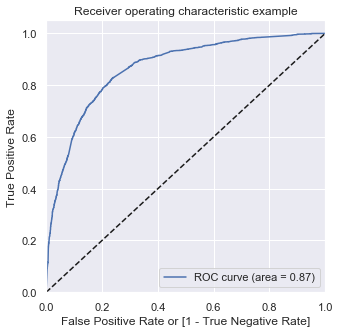

In [1500]:
draw_roc(lead_score_df.Converted, lead_score_df.lead_score)

In [1501]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lead_score_df[i]= lead_score_df.lead_score.map(lambda x: 1 if x > i else 0)
lead_score_df.head()

,Prospect ID,lead_score,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,52fc93b9-9bc6-4eec-8d55-81010968a932,0.281003,0,1,1,1,0,0,0,0,0,0,0
1,85195b85-b384-4745-8e50-719566f70f52,0.177681,0,1,1,0,0,0,0,0,0,0,0
2,94537f7d-12c0-4ea1-ab7e-c19ecab33f55,0.120509,0,1,1,0,0,0,0,0,0,0,0
3,f388f77b-af57-4cdb-bf93-ebd34055bec8,0.351225,0,1,1,1,1,0,0,0,0,0,0
4,d1d0d30e-7e88-4978-80e2-8209b9b2dc0d,0.913597,0,1,1,1,1,1,1,1,1,1,1


In [1502]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lead_score_df.Converted, lead_score_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375120  1.000000  0.000000
0.1   0.1  0.567737  0.971331  0.325456
0.2   0.2  0.738684  0.902439  0.640380
0.3   0.3  0.787319  0.823706  0.765476
0.4   0.4  0.795987  0.749251  0.824043
0.5   0.5  0.798395  0.667095  0.877216
0.6   0.6  0.788443  0.587933  0.908811
0.7   0.7  0.759711  0.446727  0.947598
0.8   0.8  0.737560  0.353445  0.968148
0.9   0.9  0.699839  0.221224  0.987156


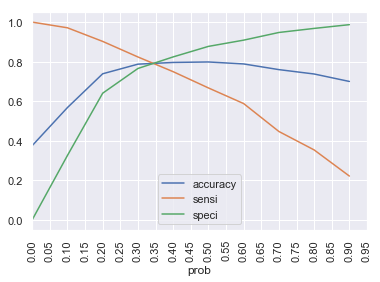

In [1503]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

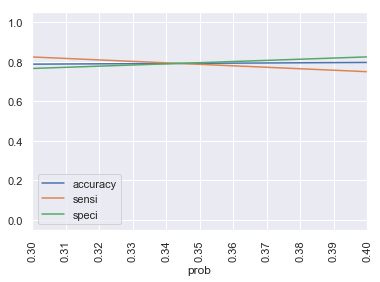

In [1504]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.3,0.4,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.3,0.4)
plt.show()

In [1505]:
lead_score_df['potential_lead'] = lead_score_df.lead_score.map( lambda x: 1 if x > 0.34 else 0)

lead_score.head()

,Prospect ID,lead_score
0,52fc93b9-9bc6-4eec-8d55-81010968a932,0.281003
1,85195b85-b384-4745-8e50-719566f70f52,0.177681
2,94537f7d-12c0-4ea1-ab7e-c19ecab33f55,0.120509
3,f388f77b-af57-4cdb-bf93-ebd34055bec8,0.351225
4,d1d0d30e-7e88-4978-80e2-8209b9b2dc0d,0.913597


In [1506]:
# Let's check the overall accuracy.
metrics.accuracy_score(lead_score_df.Converted, lead_score_df.potential_lead)

0.7898876404494382

In [1507]:
confusion2 = metrics.confusion_matrix(lead_score_df.Converted, lead_score_df.potential_lead)
confusion2

array([[3055,  838],
       [ 471, 1866]])

In [1174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1508]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8383233532934131

In [1509]:
# Let us calculate specificity
TN / float(TN+FP)

0.7843019772318753

In [1510]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.21569802276812464


In [1511]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7


In [1512]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8898708361658736


# Predictions on test set

In [1513]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1514]:
X_test_sm = sm.add_constant(X_test[cols])
y_test_pred = logmodel14.fit().predict(X_test_sm)

In [1515]:
y_test_pred.head()

Prospect ID
424571be-bd69-471d-b70d-069b6520100d    0.065890
75fd3b62-17d6-4bf8-bf77-5bba3dea6cd5    0.173942
8f48e67f-e747-425b-aa21-48966a4af94c    0.111471
08db8839-3c50-4923-b968-d162b997e5b6    0.277394
cb665c65-561f-487b-84b6-6f4ce8eb01e0    0.884563
dtype: float64

In [1516]:
leads_test_df = y_test_pred.reset_index().rename(columns = {0:'lead_score'})

In [1517]:
leads_test_df.head()

,Prospect ID,lead_score
0,424571be-bd69-471d-b70d-069b6520100d,0.065890
1,75fd3b62-17d6-4bf8-bf77-5bba3dea6cd5,0.173942
2,8f48e67f-e747-425b-aa21-48966a4af94c,0.111471
3,08db8839-3c50-4923-b968-d162b997e5b6,0.277394
4,cb665c65-561f-487b-84b6-6f4ce8eb01e0,0.884563


In [1518]:
leads_test_df = pd.merge(leads_test_df,y_test.reset_index(),on = 'Prospect ID')

In [1520]:
leads_test_df['potential_lead'] = leads_test_df.lead_score.map( lambda x: 1 if x > 0.34 else 0)

In [1521]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(leads_test_df.Converted, leads_test_df.potential_lead))

confusion_test = metrics.confusion_matrix(leads_test_df.Converted, leads_test_df.potential_lead)
confusion_test

0.7880943466866343


array([[1313,  356],
       [ 210,  792]])

In [1522]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1523]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7904191616766467

In [1524]:
# Let us calculate specificity
TN / float(TN+FP)

0.786698621929299

In [1525]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.21330137807070101


In [1526]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6898954703832753


In [1527]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8621142481943532


Train and test set results are similar therefore model is consistent

# Final model

In [1528]:
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1529]:
X_final_sm = sm.add_constant(X[cols])
logmodel_final = sm.GLM(y,X_final_sm,family = sm.families.Binomial())
print(logmodel_final.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 8901
Model:                            GLM   Df Residuals:                     8886
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3947.1
Date:                Mon, 10 Jun 2019   Deviance:                       7894.2
Time:                        22:16:01   Pearson chi2:                 9.18e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2543     

In [1530]:
y_final_pred = logmodel_final.fit().predict(X_final_sm)

In [1531]:
y_final_pred.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.178800
2a272436-5132-4136-86fa-dcc88c88f482    0.332522
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    0.762918
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0.108607
3256f628-e534-4826-9d63-4a8b88782852    0.583386
dtype: float64

In [1532]:
lead_score_final = y_final_pred.reset_index().rename(columns = {0:'lead_score'})
lead_score_final = pd.merge(lead_score_final,y.reset_index(),on='Prospect ID')

In [1533]:
lead_score_final.head()

,Prospect ID,lead_score,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.178800,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0.332522,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.762918,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.108607,0
4,3256f628-e534-4826-9d63-4a8b88782852,0.583386,1


In [1534]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lead_score_final[i]= lead_score_final.lead_score.map(lambda x: 1 if x > i else 0)
lead_score_final.head()

,Prospect ID,lead_score,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.178800,0,1,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0.332522,0,1,1,1,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.762918,1,1,1,1,1,1,1,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.108607,0,1,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0.583386,1,1,1,1,1,1,1,0,0,0,0


In [1535]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','TP','FN','FP','TN'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lead_score_final.Converted, lead_score_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    tp = cm1[1,1]
    fn = cm1[1,0]
    fp = cm1[0,1]
    tn = cm1[0,0]
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,tp,fn,fp,tn]
print(cutoff_df)

     prob  accuracy     sensi     speci      TP      FN      FP      TN
0.0   0.0  0.375126  1.000000  0.000000  3339.0     0.0  5562.0     0.0
0.1   0.1  0.566229  0.970650  0.323445  3241.0    98.0  3763.0  1799.0
0.2   0.2  0.736322  0.900270  0.637900  3006.0   333.0  2014.0  3548.0
0.3   0.3  0.784968  0.824798  0.761057  2754.0   585.0  1329.0  4233.0
0.4   0.4  0.795529  0.747230  0.824524  2495.0   844.0   976.0  4586.0
0.5   0.5  0.797888  0.665169  0.877562  2221.0  1118.0   681.0  4881.0
0.6   0.6  0.789799  0.589398  0.910104  1968.0  1371.0   500.0  5062.0
0.7   0.7  0.762611  0.451033  0.949658  1506.0  1833.0   280.0  5282.0
0.8   0.8  0.739355  0.355795  0.969615  1188.0  2151.0   169.0  5393.0
0.9   0.9  0.698910  0.218329  0.987415   729.0  2610.0    70.0  5492.0


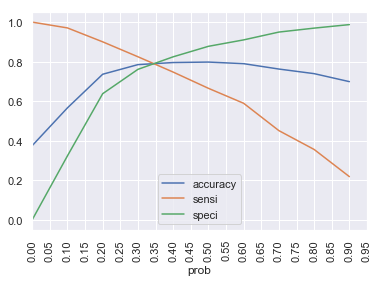

In [1536]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,0.05))
plt.xticks(rotation='vertical')
plt.show()

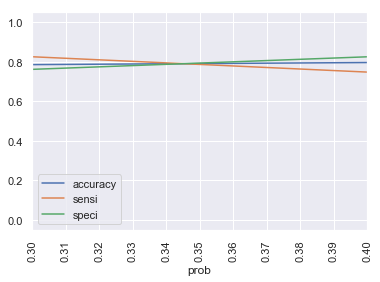

In [1537]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0.3,0.4,0.01))
plt.xticks(rotation='vertical')
plt.xlim(0.3,0.4)
plt.show()

In [1538]:
lead_score_final['potential_lead'] = lead_score_final.lead_score.map( lambda x: 1 if x > 0.34 else 0)

In [1539]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(lead_score_final.Converted, lead_score_final.potential_lead))

confusion_final = metrics.confusion_matrix(lead_score_final.Converted, lead_score_final.potential_lead)
confusion_final

0.7908100213459162


array([[4375, 1187],
       [ 675, 2664]])

In [1540]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1541]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7904191616766467

In [1542]:
# Let us calculate specificity
TN / float(TN+FP)

0.786698621929299

In [1543]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.21330137807070101


In [1544]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6898954703832753


In [1545]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8621142481943532
